## Problem set-3: Problem 3-c

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the data
sampled_data = np.loadtxt('HW3_Bandlimited_function_data.csv', delimiter=',')

In [3]:
# Extracting data points and function evaluations
X = sampled_data[:, 0]
Y = sampled_data[:, 1]

In [4]:
# Defining kernel parameters and evaluating the kernel
sigma = 2
N = len(X)
kernel = np.empty([N, N])

for i in range(N):
    for j in range(N):
        if i == j:
            kernel[i, j] = sigma/np.pi
        else:
            kernel[i, j] = np.sin(sigma*(X[i] - X[j]))/(np.pi*(X[i] - X[j]))


In [5]:
# Evaluating the coefficients and the 
kernel_inverse = np.linalg.pinv(kernel)
A = np.dot(kernel_inverse, Y)
#print(A[5:10])

In [11]:
# Band-limited function
x_test = np.linspace(-20.0, +20.0, 80)
sin_x = np.sin(x_test)
cos_x = np.cos(x_test)
y_func = 40*(sin_x - np.multiply(x_test, cos_x))/np.power(x_test, 3)

In [12]:
# Interpolated function
num = len(x_test)
y_test = np.zeros(num)
for i in range(num):
    for j in range(N):
        y_test[i] += A[j]*np.sin(sigma*(x_test[i] - X[j]))/(np.pi*(x_test[i] - X[j]))

#print(y_test[1:5])

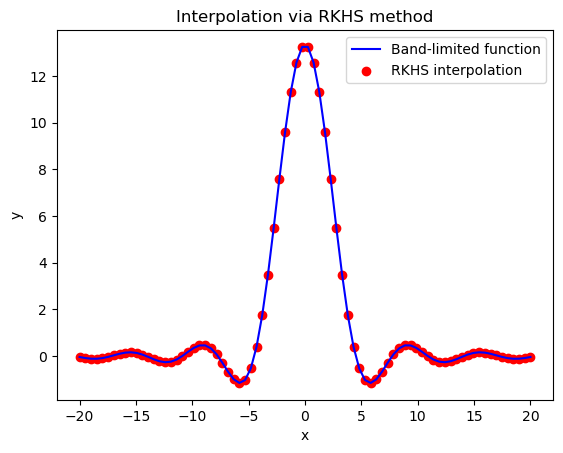

In [13]:
# Plotting the interpolated curve vs the given data points
plt.plot(x_test, y_func, color='b')
plt.scatter(x_test, y_test, color='r')
plt.legend(['Band-limited function', 'RKHS interpolation'], loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation via RKHS method')
plt.show()